In [1]:
import time
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import pandas as pd
import seaborn as sns
import math
import sys
import os
from sabreMod import sosf,sosfh
from scipy import interpolate

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

In [2]:
start=time.time()

In [3]:
orion=pd.read_table('Obs/Orion.csv', delimiter=',')
orion.describe()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,-0.133333,0.300000,0.366667,0.095833,0.525000,0.062500,-0.700000,-0.295833,0.141667,-0.279167,...,-1.654167,-2.845833,-1.891667,-1.308333,-0.825000,-1.041667,-0.633333,-0.166667,0.229167,0.450000
std,0.814898,1.298494,0.995497,1.257492,1.217713,1.553905,2.062291,3.833092,2.790343,2.699272,...,3.067640,2.998692,2.519647,2.137230,2.639376,1.916500,1.313034,0.755079,0.859464,1.595919
min,-3.900000,-2.500000,0.000000,-3.500000,-1.000000,-2.900000,-4.500000,-7.000000,-3.100000,-3.900000,...,-7.400000,-9.100000,-6.400000,-6.000000,-6.100000,-5.100000,-4.600000,-3.700000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.600000,-2.325000,-2.550000,-2.325000,-2.100000,...,-3.150000,-5.000000,-4.725000,-2.625000,-2.200000,-1.925000,-0.175000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.400000,-0.300000,-0.050000,...,-1.900000,-2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.200000,0.925000,0.000000,0.000000,0.125000,1.000000,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.700000,4.300000,4.600000,3.200000,3.900000,5.100000,3.800000,10.400000,6.900000,8.900000,...,6.800000,1.900000,1.400000,3.100000,7.400000,1.400000,0.500000,0.000000,4.000000,7.000000


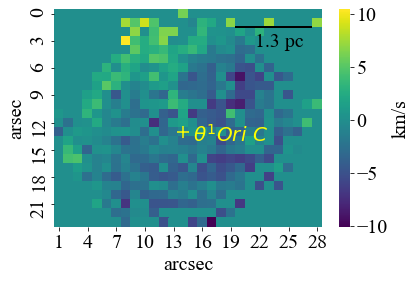

In [4]:
fig, ax = plt.subplots()
sns.heatmap(orion,cmap="viridis",cbar_kws={'label': 'km/s'})
plt.scatter(13.5, 13.5, marker='+', color='yellow', s=150)
ax.set(xlabel='arcsec', ylabel='arsec')

ax.text(0.93, 0.81, '1.3 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=2, xmin=0.68, xmax=0.96, linewidth=2, color = 'k')

plt.text(14.5, 14.5, '$θ^{1}Ori\ C$', fontsize=20, color='yellow')

plt.show()

In [5]:
df=orion.stack().reset_index().rename(columns={'level_0':'RAdeg', 'level_1':'DEdeg', 0:'RVHalpha'})
df.describe()

,RAdeg,RVHalpha
count,672.000000,672.000000
mean,11.500000,-0.667857
std,6.927343,2.440544
min,0.000000,-10.100000
25%,5.750000,-2.000000
50%,11.500000,0.000000
75%,17.250000,0.000000
max,23.000000,10.400000


In [6]:
m=df.RVHalpha>0
df=df[m]

In [7]:
df.RAdeg=1.0*df.RAdeg

In [8]:
df.DEdeg=pd.to_numeric(df.DEdeg)*1.0

Structure Function

In [9]:
df0 = pd.DataFrame({'X': df.RAdeg, 'Y': df.DEdeg, 'RV': df.RVHalpha})
df0.describe()

,X,Y,RV
count,112.000000,112.000000,112.000000
mean,7.794643,11.223214,2.632143
std,5.002951,6.235195,2.102389
min,0.000000,1.000000,0.100000
25%,3.750000,6.000000,0.875000
50%,7.000000,11.000000,2.200000
75%,11.250000,14.000000,3.825000
max,21.000000,28.000000,10.400000


In [10]:
pc=.145

1.0


[None, None]

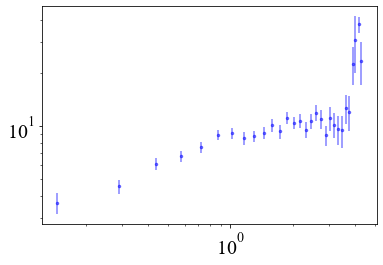

In [11]:
data=df0
SF=sosf(data)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [12]:
dfx = SF[['Lag', 'Nmqvd']].copy()
dfx=dfx.rename(columns={"Lag": "pc", "Nmqvd": "S"})
dfx.to_csv('data//CarB.csv',mode = 'w', index=False)

In [13]:
x=SF['Lag']
y=SF['Nmqvd']-(data["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([0.2776139])

In [14]:
s=SFr[0]

In [15]:
ss=np.round((data['RV'].std())**2,2)

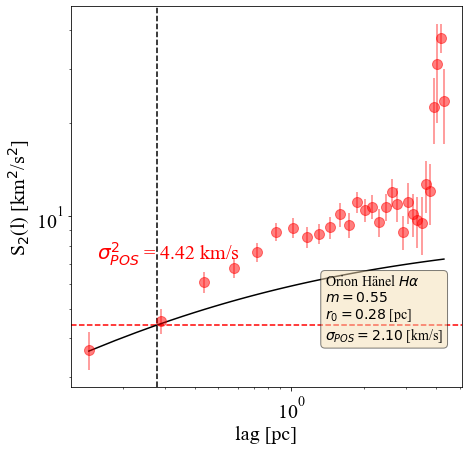

In [16]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.5, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.35,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=0.55

x=np.linspace((SF.Lag.min()),(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('Orion Hänel ' r'$Hα$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (data["RV"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

Dr. Will

In [17]:
df1 = pd.DataFrame({'RA': df.RAdeg, 'DE': df.DEdeg, 'V': df.RVHalpha, '_key': 1})
df1.describe()

,RA,DE,V,_key
count,112.000000,112.000000,112.000000,112.0
mean,7.794643,11.223214,2.632143,1.0
std,5.002951,6.235195,2.102389,0.0
min,0.000000,1.000000,0.100000,1.0
25%,3.750000,6.000000,0.875000,1.0
50%,7.000000,11.000000,2.200000,1.0
75%,11.250000,14.000000,3.825000,1.0
max,21.000000,28.000000,10.400000,1.0


In [18]:
df2 = df1.copy()

In [19]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA    DE    V  RA_   DE_   V_
13 13  0.0  14.0  6.1  0.0  14.0  6.1
   35  0.0  14.0  6.1  1.0   8.0  7.6
   36  0.0  14.0  6.1  1.0   9.0  4.9
   37  0.0  14.0  6.1  1.0  10.0  8.9
   38  0.0  14.0  6.1  1.0  11.0  4.7

In [20]:
pairs.loc[:, 'dDE'] =(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = (pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
pairs = pairs[(pairs.dDE > 0.0) & (pairs.dRA > 0.0)]
pairs.head()

,,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
43,13,1.0,16.0,3.1,0.0,14.0,6.1,2.0,0.965926,2.221039,0.346556,-3.0,9.00,0.954243,4.60
44,13,1.0,17.0,2.2,0.0,14.0,6.1,3.0,0.963630,3.150966,0.498444,-3.9,15.21,1.182129,4.15
46,13,1.0,19.0,6.8,0.0,14.0,6.1,5.0,0.958820,5.091104,0.706812,0.7,0.49,-0.309804,6.45
50,13,1.0,23.0,7.4,0.0,14.0,6.1,9.0,0.948324,9.049824,0.956640,1.3,1.69,0.227887,6.75
55,13,1.0,28.0,7.0,0.0,14.0,6.1,14.0,0.933580,14.031093,1.147092,0.9,0.81,-0.091515,6.55


In [22]:
pairs.describe()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,10.644384,16.744110,1.772055,5.399452,9.646027,3.560712,7.098082,5.064336,9.448450,0.884864,-1.788658,9.866844,-inf,2.666384
std,4.135467,6.396678,1.414209,3.634915,3.813881,2.400559,5.803122,3.413803,5.663929,0.298034,2.582867,16.043079,NaN,1.487795
min,1.000000,2.000000,0.100000,0.000000,1.000000,0.100000,1.000000,0.920505,1.370166,0.136773,-10.300000,0.000000,-inf,0.100000
25%,8.000000,13.000000,0.500000,2.000000,8.000000,1.900000,2.000000,1.972571,4.935994,0.693375,-3.200000,0.810000,-0.091515,1.550000
50%,11.000000,15.000000,1.400000,5.000000,10.000000,3.000000,5.000000,4.683361,8.058102,0.906233,-1.600000,3.610000,0.557507,2.400000
75%,13.000000,23.000000,2.500000,7.000000,12.000000,4.900000,11.000000,7.517541,13.824609,1.140653,-0.100000,11.560000,1.062958,3.500000
max,21.000000,28.000000,7.400000,18.000000,23.000000,10.400000,26.000000,16.073816,26.018099,1.415276,4.000000,106.090000,2.025674,7.800000


In [23]:
pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,0.203084,-0.357782,0.581915,-0.147061,-0.428587,0.320506,0.566701,0.502645,0.515369,0.202438,-0.194546,-0.221939,-0.515806
DE,0.203084,1.000000,0.131800,-0.126159,0.446524,-0.091338,0.808821,0.341140,0.813761,0.753547,0.157056,-0.062982,-0.043053,-0.011046
V,-0.357782,0.131800,1.000000,-0.235031,0.111481,0.160751,0.072014,-0.181561,-0.014553,-0.058338,0.398130,-0.142619,-0.077865,0.604956
RA_,0.581915,-0.126159,-0.235031,1.000000,-0.496630,-0.603306,0.187328,-0.339710,0.047617,0.005047,0.432034,-0.383135,-0.423159,-0.598420
DE_,-0.147061,0.446524,0.111481,-0.496630,1.000000,0.049583,-0.165017,0.314586,-0.029104,0.015460,0.014956,0.015174,0.072239,0.092985
V_,-0.428587,-0.091338,0.160751,-0.603306,0.049583,1.000000,-0.133267,0.122520,-0.074503,-0.057647,-0.841399,0.778127,0.656212,0.883151
dDE,0.320506,0.808821,0.072014,0.187328,-0.165017,-0.133267,1.000000,0.169283,0.916122,0.820461,0.163291,-0.079396,-0.094957,-0.073287
dRA,0.566701,0.341140,-0.181561,-0.339710,0.314586,0.122520,0.169283,1.000000,0.524017,0.584574,-0.213283,0.169873,0.176866,0.012552
s,0.502645,0.813761,-0.014553,0.047617,-0.029104,-0.074503,0.916122,0.524017,1.000000,0.944572,0.061276,0.000136,-0.013351,-0.067022
log_s,0.515369,0.753547,-0.058338,0.005047,0.015460,-0.057647,0.820461,0.584574,0.944572,1.000000,0.021635,0.031572,0.010242,-0.074233


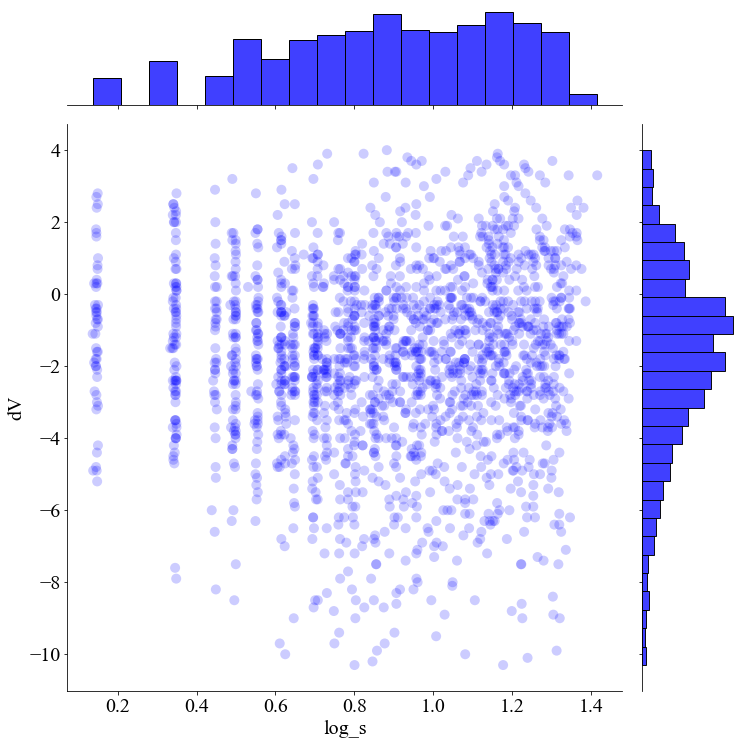

In [24]:
mask = (pairs.log_s > 0) & (pairs.log_dV2 > -4)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.2, s=100, edgecolor='none',color="blue")
ax.fig.set_size_inches(12, 12)

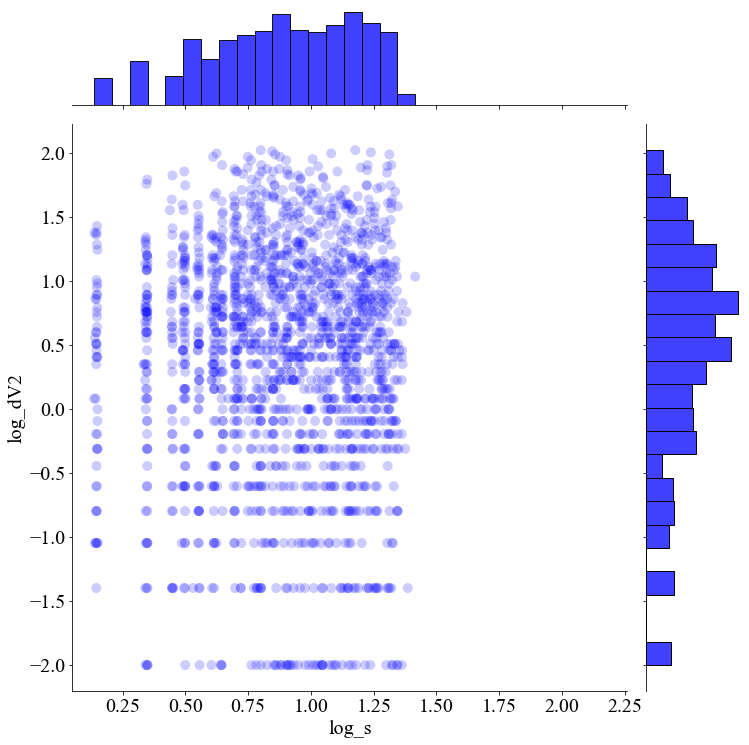

In [25]:
mask = (pairs.log_s > 0) & (pairs.log_dV2 > -4)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.2, s=100, edgecolor='none', color="blue", xlim=[0.05, 2.26])
ax.fig.set_size_inches(12, 12)

In [26]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)
pairs.s_class[pairs.s_class == 0] = 1

In [27]:
for j in range(5):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
              dV2       log_s
count  586.000000  586.000000
mean     8.603532    0.531157
std     13.911994    0.168107
min      0.000000    0.136773
25%      0.810000    0.446800
50%      3.805000    0.555323
75%     10.240000    0.649450
max    100.000000    0.749276

s_class = 2
               dV2        log_s
count  1039.000000  1039.000000
mean     10.781809     1.003922
std      17.189785     0.146599
min       0.000000     0.750462
25%       0.810000     0.875534
50%       3.610000     1.004737
75%      12.250000     1.139713
max     106.090000     1.249814

s_class = 3
              dV2       log_s
count  200.000000  200.000000
mean     8.815100    1.302719
std     15.448938    0.032710
min      0.000000    1.250484
25%      0.810000    1.276068
50%      2.560000    1.303385
75%      9.767500 

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


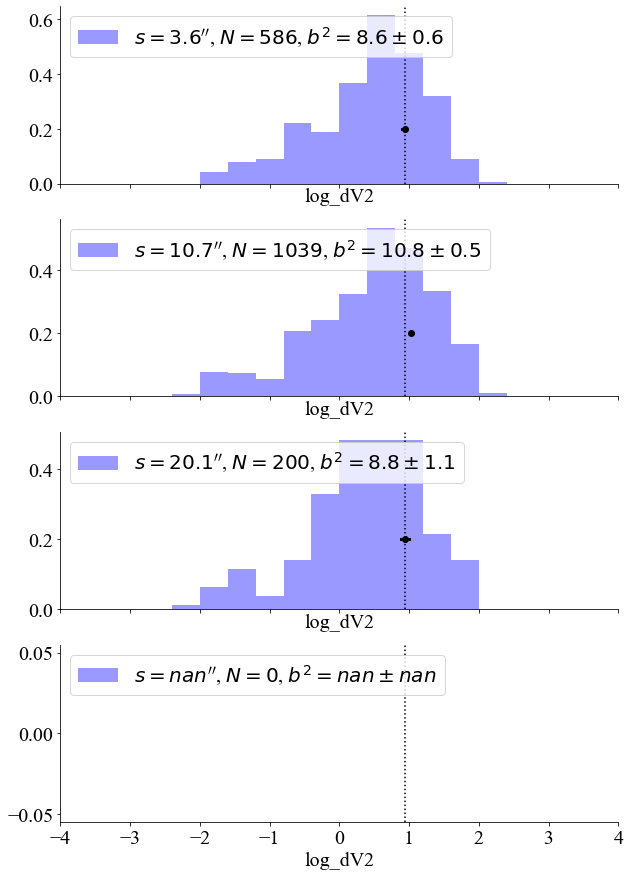

In [28]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 5), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20, color="blue",hist_kws=dict(range=[-4.0, 4.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-4.0, 4.0])
    ax.legend(loc='upper left')
sns.despine()

In [29]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 8.76


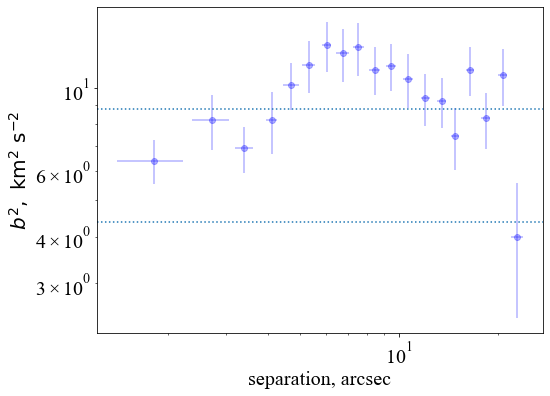

In [30]:
ngroup = 100
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.3, color="blue")
#sgrid = np.logspace(0.3, 1.65)
#ax.plot(sgrid, 38.5*sgrid**(0.8), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

[None,
 Text(0, 0.5, '$b^2,\\ \\mathrm{km^2\\ s^{-2}}$'),
 None,
 Text(0.5, 0, 'separation, pc')]

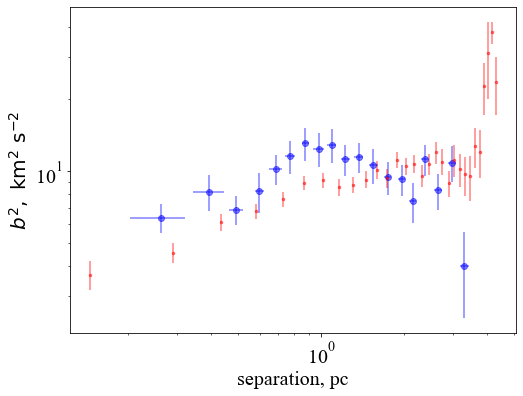

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s*.145, b2, yerr=e_b2, xerr=e_s*.145, fmt='o', alpha=0.5,color="blue")

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.5, markersize=5)

ax.set(xscale='log', yscale='log', 
       xlabel='separation, pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )

<ipython-input-32-1c01b0fdd51b>:14: RuntimeWarning: invalid value encountered in power
  c=1/(1+(x/lo)**n)


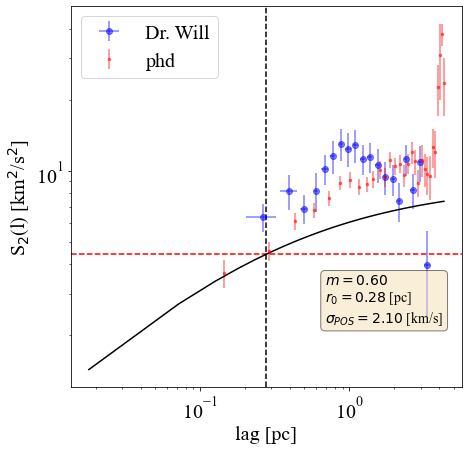

In [32]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.errorbar(s*.145, b2, yerr=e_b2, xerr=e_s*.145, fmt='o', alpha=0.5,color="blue",label='Dr. Will')

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.5, markersize=5,label='phd')

lo=SFr[0]
ss=np.round((data['RV'].std())**2,2)
s0=SFr[0]

n=0.6
x=np.linspace(-1,(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

#sgrid = np.logspace(-1, 1)
#ax.plot(sgrid, 5.2*sgrid**(0.75), color="k", lw=2, linestyle='--')

plt.axhline(y=ss, color='r', linestyle='--')
plt.axvline(x=s0, color='k', linestyle='--')


plt.loglog(x,y,color='k', linestyle='-')

textstr = '\n'.join((r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s0+' [pc]',
                     r'$σ_{POS}=%.2f$' % (df0["RV"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set(xscale='log', yscale='log', 
       xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]'
      )

#ax.set_xlim(1, 200)
#ax.set_ylim(1, 250)

plt.legend()

fig.savefig('SFM420.pdf', bbox_inches='tight')

<ipython-input-33-b4c13e42c1ca>:14: RuntimeWarning: invalid value encountered in power
  c=1/(1+(x/lo)**n)


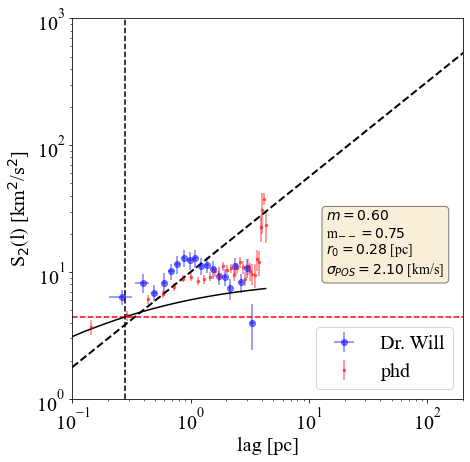

In [33]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.errorbar(s*.145, b2, yerr=e_b2, xerr=e_s*.145, fmt='o', alpha=0.5,color="blue",label='Dr. Will')

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.5, markersize=5,label='phd')

lo=SFr[0]
ss=np.round((data['RV'].std())**2,2)
s0=SFr[0]

n=0.6
x=np.linspace(-1,(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

#sgrid = np.logspace(-1, 1)
#ax.plot(sgrid, 5.2*sgrid**(0.75), color="k", lw=2, linestyle='--')

plt.axhline(y=ss, color='r', linestyle='--')
plt.axvline(x=s0, color='k', linestyle='--')


plt.loglog(x,y,color='k', linestyle='-')

sgrid = np.logspace(-1, 300)
ax.plot(sgrid, 10*sgrid**(0.75), color="k", lw=2, linestyle='--')

textstr = '\n'.join((r'$m=%.2f$'%n,r'm$_{--}=%.2f$'%0.75, r'$r_{0}=%.2f$' % s0+' [pc]',
                     r'$σ_{POS}=%.2f$' % (df0["RV"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .5, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set(xscale='log', yscale='log', 
       xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]'
      )
ax.set_xlim(0.1, 200)
ax.set_ylim(1, 1000)



plt.legend()

fig.savefig('SFM42.pdf', bbox_inches='tight')

In [34]:
finish=time.time()
print("Runnig time:",finish-start, "seconds" )

Runnig time: 10.720191955566406 seconds
